In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from matplotlib.mlab import psd

from ipywidgets import interact
import ipywidgets as widgets

<IPython.core.display.Javascript object>


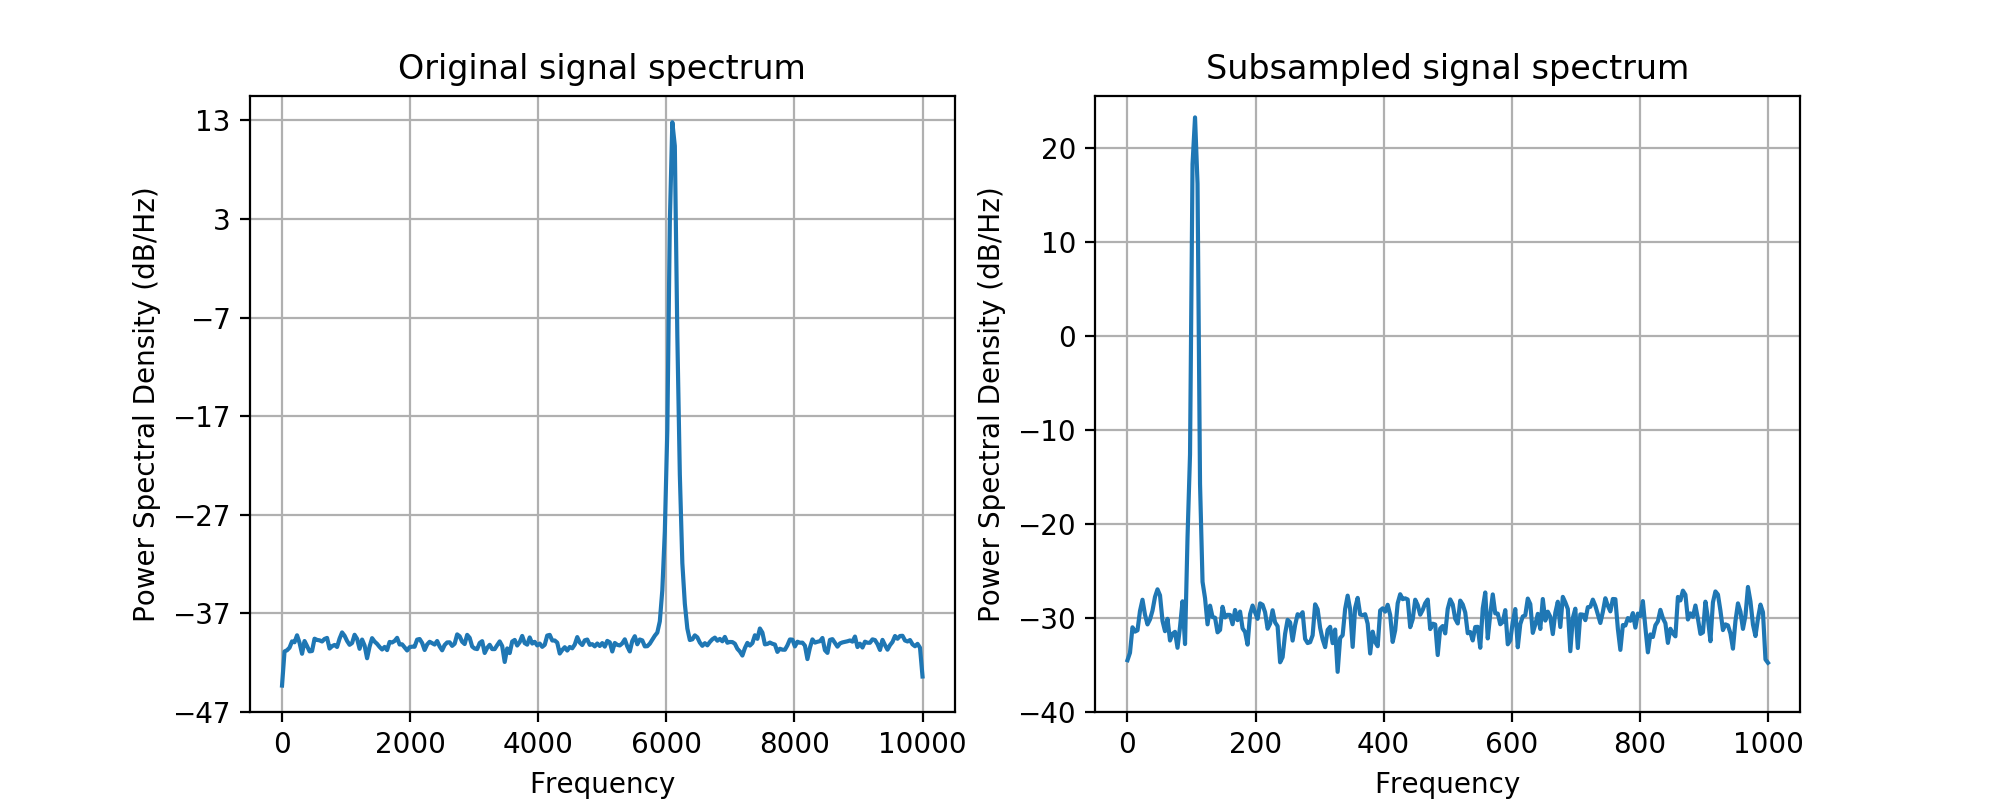

interactive(children=(IntSlider(value=12161, description='freq', max=16000, min=12000, step=10), Output()), _d…

In [76]:
timeseries = np.random.randn(40000) + 50*np.sin(12161*np.linspace(0, 2*np.pi, 40000))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original signal spectrum")
p, f, lorig = plt.psd(timeseries, Fs=20000, return_line=True, NFFT=512);

plt.subplot(1,2,2)
plt.title("Subsampled signal spectrum")
# take every 100th sample
subsampled_timeseries = timeseries[::10]
fs, ps, lsub = plt.psd(subsampled_timeseries, Fs=2000, return_line=True, NFFT=512);

def update(freq):
    timeseries = np.random.randn(40000) + 50*np.sin(freq*np.linspace(0, 2*np.pi, 40000))
    op, freqs = psd(timeseries, Fs=20000, NFFT=512)
    
    lorig[0].set_ydata(10*np.log10(op))
    
    subsampled_timeseries = timeseries[::10]
    sp, freqs2 = psd(subsampled_timeseries, Fs=2000, NFFT=512)
    
    lsub[0].set_ydata(10*np.log10(sp))

freq_slider = widgets.IntSlider(value=12161, min=12000, max=16000, step=10)
interact(update, freq=freq_slider);

<IPython.core.display.Javascript object>


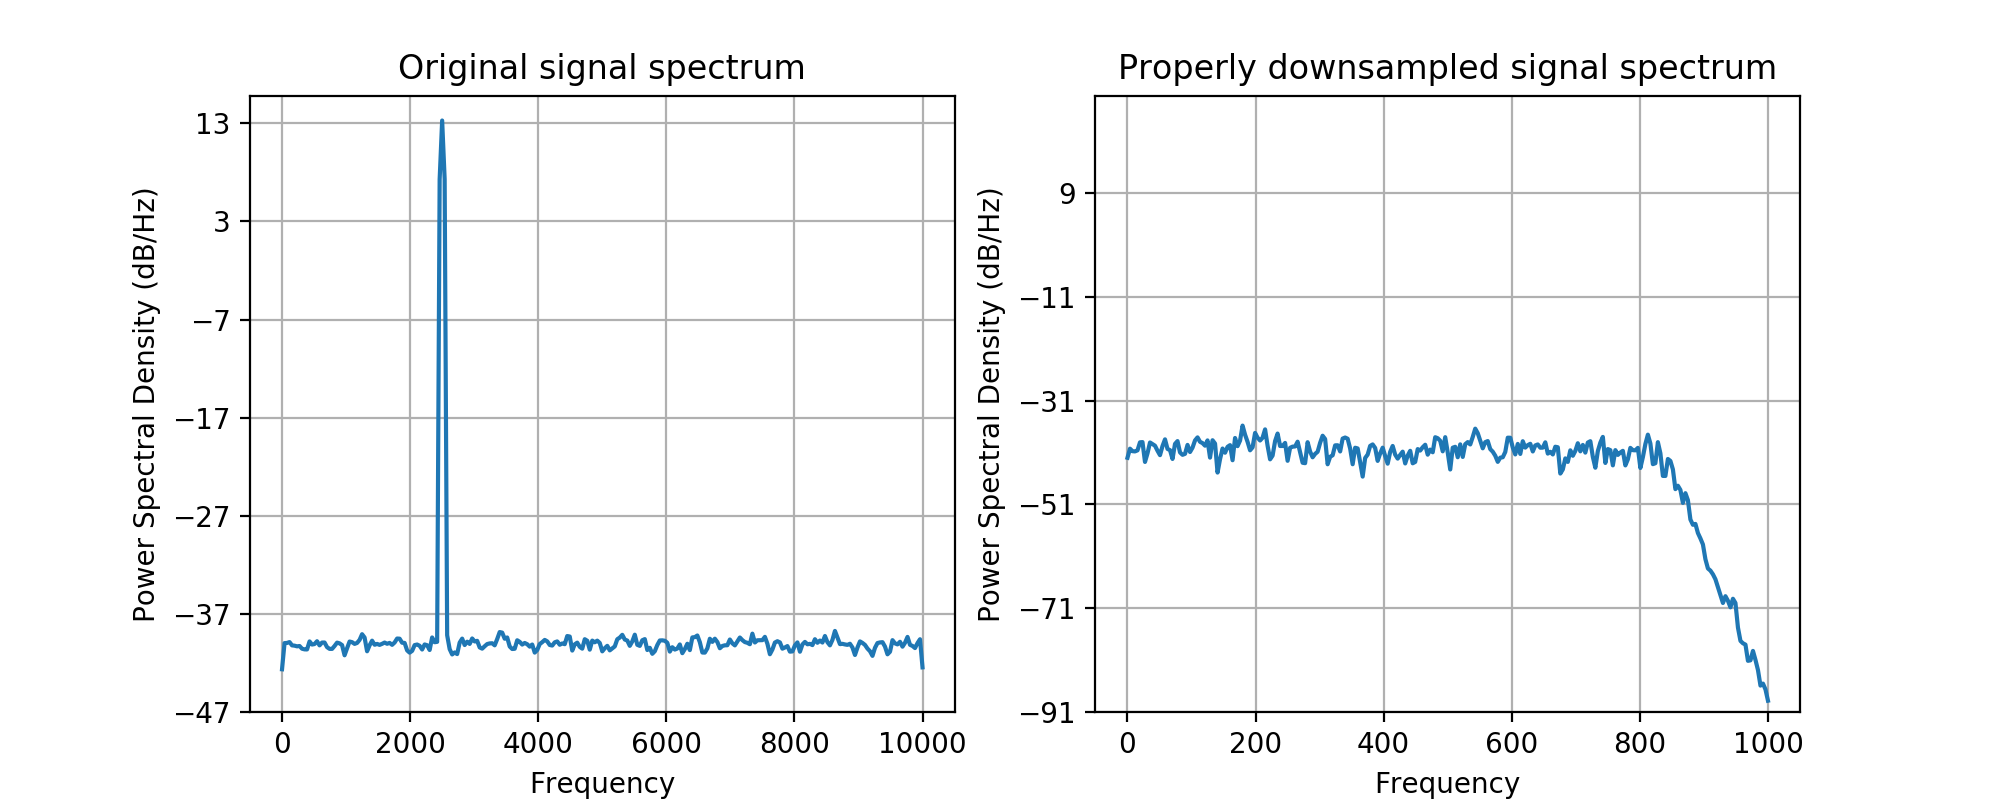

interactive(children=(FloatSlider(value=5000.0, description='freq', max=5000.0, min=200.0, step=10.0), Output(…

In [82]:
timeseries = np.random.randn(40000) + 50*np.sin(800*np.linspace(0, 2*np.pi, 40000))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original signal spectrum")
p, f, lorig = plt.psd(timeseries, Fs=20000, return_line=True, NFFT=512);

plt.subplot(1,2,2)
plt.title("Properly downsampled signal spectrum")
# properly downsample
subsampled_timeseries = signal.decimate(timeseries, 10, n=8)
fs, ps, lsub = plt.psd(subsampled_timeseries, Fs=2000, return_line=True, NFFT=512);
#plt.ylim(-77, 15)

def update(freq):
    timeseries = np.random.randn(40000) + 50*np.sin(freq*np.linspace(0, 2*np.pi, 40000))
    op, freqs = psd(timeseries, Fs=20000, NFFT=512)
    
    lorig[0].set_ydata(10*np.log10(op))
    
    subsampled_timeseries = signal.decimate(timeseries, 10, n=8)
    sp, freqs2 = psd(subsampled_timeseries, Fs=2000, NFFT=512)
    
    lsub[0].set_ydata(10*np.log10(sp))

freq_slider = widgets.FloatSlider(value=12161, min=200, max=5000, step=10)
interact(update, freq=freq_slider);